#**Overview:**
This notebook loads the provided csv files and does the following:
The two csv files that inlcude the pathology labels (chexpert and negbio) are loaded and filtered for studies relevant to pneumonia. Irrelevant columns are dropped. The two generated labels are then compared on the provided data that was human verified. Based on these results the negbio labeler was chosen as it had a slightly higher performance compared to chexpert.
The negbio labels were then added to the dataframe, along with the file paths to the reports using the studiy-list.csv file.
The raw text data was then read from the files and added to a new column called text.
The resulting csv file was than saved to google drive.

**EDIT: the proposed train test split will be added to the final csv file

In [1]:
import pandas as pd


###Loading text files and preprocessing:




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/Dissertation"
test_labels = pd.read_csv(path+"/mimic-cxr-2.1.0-test-set-labeled.csv")
providers = pd.read_csv(path+"/cxr-provider-list.csv")
records = pd.read_csv(path+"/cxr-record-list.csv")
studies = pd.read_csv(path+"/cxr-study-list.csv")
chex_labels = pd.read_csv(path+"/mimic-cxr-2.0.0-chexpert.csv")
negbio_labels = pd.read_csv(path+"/mimic-cxr-2.0.0-negbio.csv")
split = pd.read_csv(path+"/mimic-cxr-2.0.0-split.csv")

In [ ]:
chex_labels

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
#selecting only the studies that are relevant to Pneumonia
chex_labels = chex_labels.drop(['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumothorax', 'Support Devices'], axis=1)
negbio_labels = negbio_labels.drop(['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumothorax', 'Support Devices'], axis=1)
test_labels = test_labels.drop([ 'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Lesion', 'Airspace Opacity', 'Edema', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'], axis=1)

In [5]:
chex_labels = chex_labels.dropna()
negbio_labels = negbio_labels.dropna()
test_labels = test_labels.dropna()

In [6]:
negbio_labels

,subject_id,study_id,Pneumonia
4,10000764,57375967,-1.0
7,10000935,50578979,1.0
8,10000935,51178377,-1.0
13,10000980,50985099,-1.0
14,10000980,51967283,1.0
...,...,...,...
227796,19998770,51149538,0.0
227801,19998843,56350227,1.0
227805,19999068,54061983,-1.0
227808,19999068,59390811,-1.0


Checking accuracy of negbio and chexpert labels on Pneumonia:

In [7]:
# merging the dataframes with the test_labels dataframe for the comparison
label_comparison = pd.merge(negbio_labels, chex_labels, on='study_id',suffixes=('_negbio','_chexpert'))
label_comparison = pd.merge(label_comparison,test_labels , on='study_id')
label_comparison.rename(columns={'subject_id_negbio': 'subject_id'}, inplace=True)
label_comparison.drop('subject_id_chexpert',axis=1)

,subject_id,study_id,Pneumonia_negbio,Pneumonia_chexpert,Pneumonia
0,10274145,56140866,1.0,1.0,1.0
1,10402372,52824884,0.0,0.0,0.0
2,10402372,57949791,0.0,0.0,0.0
3,10532326,59775769,-1.0,-1.0,-1.0
4,10650001,56172325,0.0,0.0,0.0
...,...,...,...,...,...
225,19894745,50421764,0.0,0.0,0.0
226,19907884,51326934,0.0,0.0,0.0
227,19907884,55906329,0.0,-1.0,0.0
228,19914761,52697084,0.0,0.0,0.0


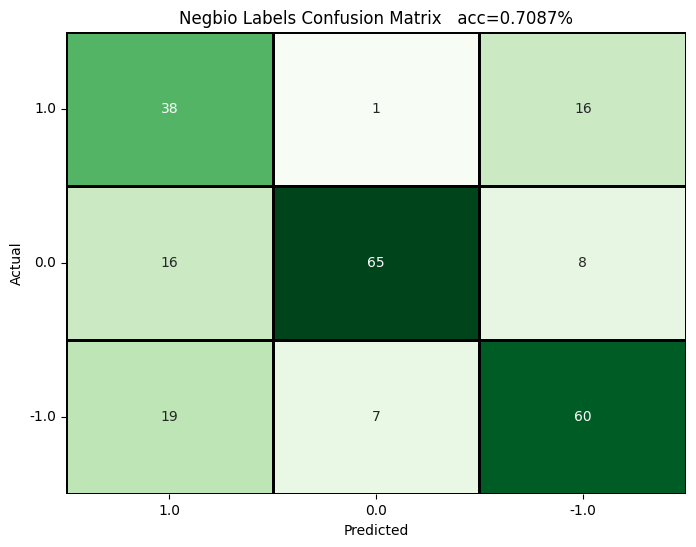

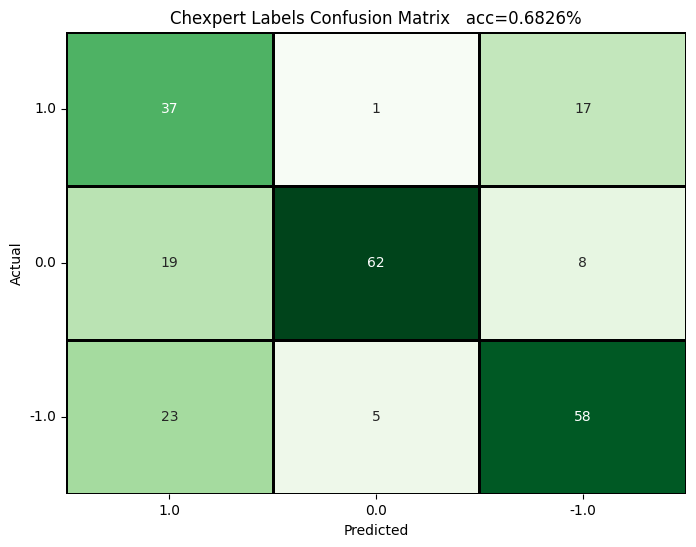

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#calculating accuracy
negbio_acc = accuracy_score(label_comparison['Pneumonia_negbio'], label_comparison['Pneumonia'])
chex_acc = accuracy_score(label_comparison['Pneumonia_chexpert'], label_comparison['Pneumonia'])
conf_matrix_negbio = confusion_matrix(label_comparison['Pneumonia'], label_comparison['Pneumonia_negbio'], labels=[1.0, 0.0, -1.0])
conf_matrix_chexpert = confusion_matrix(label_comparison['Pneumonia'], label_comparison['Pneumonia_chexpert'], labels=[1.0, 0.0, -1.0])

#plotting confusion matrices
#negbio
labels = ['1.0', '0.0', '-1.0']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_negbio, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=1, linecolor='black')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Negbio Labels Confusion Matrix   acc='+str(round(negbio_acc,4))+'%')
plt.show()
#chexpert
labels = ['1.0', '0.0', '-1.0']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_chexpert, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=1, linecolor='black')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Chexpert Labels Confusion Matrix   acc='+str(round(chex_acc,4))+'%')
plt.show()

In [9]:
#exploring the reccomended train test val split
train=0
test=0
val=0
other=0
for i in range(len(split)):
  if split['split'][i]=='train':
    train+=1
  elif split['split'][i]=='test':
    test+=1
  elif split['split'][i]=='validate':
    val+=1
print(train,test,val,train+test+val)

368960 5159 2991 377110


Adding the text files and image file paths to the dataframe:

In [ ]:
df = pd.merge(negbio_labels, studies, on=['study_id', 'subject_id'],suffixes=('_negbio','_1'))
df.rename(columns={'path': 'report_path'}, inplace=True)
print(df)

       subject_id  study_id  Pneumonia                        report_path
0        10000764  57375967       -1.0  files/p10/p10000764/s57375967.txt
1        10000935  50578979        1.0  files/p10/p10000935/s50578979.txt
2        10000935  51178377       -1.0  files/p10/p10000935/s51178377.txt
3        10000980  50985099       -1.0  files/p10/p10000980/s50985099.txt
4        10000980  51967283        1.0  files/p10/p10000980/s51967283.txt
...           ...       ...        ...                                ...
59180    19998770  51149538        0.0  files/p19/p19998770/s51149538.txt
59181    19998843  56350227        1.0  files/p19/p19998843/s56350227.txt
59182    19999068  54061983       -1.0  files/p19/p19999068/s54061983.txt
59183    19999068  59390811       -1.0  files/p19/p19999068/s59390811.txt
59184    19999270  55274188        0.0  files/p19/p19999270/s55274188.txt

[59185 rows x 4 columns]


In [ ]:
#selecting a subset of the whole database
# df = df[df.iloc[:, -1].str.contains('p19|p18')]
df

,subject_id,study_id,Pneumonia,report_path
0,10000764,57375967,-1.0,files/p10/p10000764/s57375967.txt
1,10000935,50578979,1.0,files/p10/p10000935/s50578979.txt
2,10000935,51178377,-1.0,files/p10/p10000935/s51178377.txt
3,10000980,50985099,-1.0,files/p10/p10000980/s50985099.txt
4,10000980,51967283,1.0,files/p10/p10000980/s51967283.txt
...,...,...,...,...
59180,19998770,51149538,0.0,files/p19/p19998770/s51149538.txt
59181,19998843,56350227,1.0,files/p19/p19998843/s56350227.txt
59182,19999068,54061983,-1.0,files/p19/p19999068/s54061983.txt
59183,19999068,59390811,-1.0,files/p19/p19999068/s59390811.txt


In [ ]:
import pandas as pd

texts = []
labels = df['Pneumonia'].tolist()
study_ids = df['study_id'].tolist()
base_path = "/content/drive/My Drive/Dissertation/reports/"

# Load the text files
for path in df['report_path']:
  full_path = base_path + path
  with open(full_path, 'r') as file:
      text = file.read()
      texts.append(text)

# Create a DataFrame with the texts and labels
data = {'study_id':study_ids,'text': texts, 'label': labels}
pneumonia_df = pd.DataFrame(data)

In [ ]:
# # Convert to Hugging Face Dataset
# dataset = Dataset.from_pandas(data_df)
df = df.reset_index(drop=True)
pneumonia_df['study_id']=df['study_id']

In [ ]:
pneumonia_df

,study_id,text,label
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


In [ ]:
max1=0
id1=0
for i in range(len(pneumonia_df['text'])):
  l =len(pneumonia_df['text'][i])
  if l>max1:
               max1=l
               id1=i

print(l,id1)

In [ ]:
print(pneumonia_df['text'][id1])
print('label',pneumonia_df['label'][id1])

In [ ]:
lbl = pneumonia_df['label']
pneumonia_df = pneumonia_df.drop('label',axis=1)
pneumonia_df['pneumonia'] = lbl

In [ ]:
pneumonia_df

,study_id,text,pneumonia
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


Adding the reccomended train validate test split do the dataframe

In [10]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv') # alt: pneumonia2 with two parts, or pneumonia_full with all of the data
# df_test = pd.read_csv('/content/drive/My Drive/Dissertation/mimic-cxr-2.1.0-test-set-labeled.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
assert (df['study_id'] == pd.merge(df, split_unique, on=['study_id'], how='left')['study_id']).all()

In [ ]:
split_unique = split[['study_id', 'split']].drop_duplicates(subset=['study_id'])
pneumonia_df = pd.merge(df, split_unique, on=['study_id'], how='left')
display(pneumonia_df.head())

,study_id,text,pneumonia,split
0,57375967,FINAL REPORT\...,-1.0,train
1,50578979,FINAL REPORT\...,1.0,train
2,51178377,FINAL REPORT\...,-1.0,train
3,50985099,FINAL REPORT\...,-1.0,train
4,51967283,FINAL REPORT\...,1.0,train


In [ ]:
# save the dataframe to csv file
pneumonia_df.to_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv', index=False)

##Creating a dataframe that has the human verified label values and checking the data

In [ ]:
testdf = pd.read_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv')
testdf

,study_id,text,pneumonia
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


In [ ]:
df_test

,study_id,Pneumonia
0,59761780,0.0
1,58848750,1.0
2,56480068,0.0
3,57661627,0.0
4,51924292,-1.0
...,...,...
229,57261102,-1.0
230,56277244,1.0
231,54325260,-1.0
232,50567642,1.0


In [ ]:
#checking the human verified study list with correct labeling
for i in range(len(df_test)-1):
  if df_test['study_id'][i] not in df['study_id'].tolist():
    print(df_test['study_id'][i],df_test['Pneumonia'][i])

54107786 -1.0
57141526 -1.0
50916783 0.0
52682048 -1.0


There seem to be 4 studies where human experts added a pneumonia label, where the negbio had NaN

In [ ]:
df_test = df_test.drop(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Lesion', 'Airspace Opacity', 'Edema', 'Consolidation',
        'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'],axis=1)
df_test = df_test.dropna()
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
pneumonia_test = pd.merge(df_test, df, on=['study_id'],suffixes=('_actual','_negbio'))

In [ ]:
pneumonia_test

,study_id,text,pneumonia
0,59761780,FINAL REPORT\...,0.0
1,58848750,FINAL REPORT\...,1.0
2,56480068,FINAL REPORT\...,0.0
3,57661627,WET READ: ___ ___ 9:19 PM\n Post-surgical ch...,0.0
4,51924292,FINAL REPORT\...,-1.0
...,...,...,...
225,57261102,FINAL REPORT\...,-1.0
226,56277244,FINAL REPORT\...,1.0
227,54325260,FINAL REPORT\...,-1.0
228,50567642,FINAL REPORT\...,1.0


In [ ]:
pneumonia_test = pneumonia_test.rename(columns={'Pneumonia':'pneumonia'})

In [ ]:
pneumonia_test.to_csv('/content/drive/My Drive/Dissertation/pneumonia_test.csv', index=False)

In [14]:
sample_df = df.groupby('pneumonia').sample(n=1, random_state=42)
print(sample_df['text'])

5357                                      FINAL REPORT\...
42287                                     FINAL REPORT\...
22634                                     FINAL REPORT\...
Name: text, dtype: object


In [15]:
for index, row in sample_df.iterrows():
  print(f"Report for class {row['pneumonia']}:")
  print(row['text'])

Report for class -1.0:
                                 FINAL REPORT
 EXAMINATION:  CHEST (PORTABLE AP)
 
 INDICATION:  History: ___F with HIV presents with hypotension, diarrhea and
 somnolence
 
 TECHNIQUE:  Portable semi-upright AP view of the chest
 
 COMPARISON:  Chest radiograph ___
 
 FINDINGS: 
 
 Lung volumes are low.  Heart size is mildly enlarged, as seen on the previous
 study.  The mediastinal contour is grossly unremarkable.  Crowding of
 bronchovascular structures is demonstrated without overt pulmonary edema. 
 Patchy opacities in the lung bases may reflect atelectasis in the setting of
 low lung volumes.  No definite focal consolidation, pleural effusion or
 pneumothorax is seen.  There are no acute osseous abnormalities.
 
 IMPRESSION: 
 
 Low lung volumes with patchy bibasilar airspace opacities potentially
 reflecting atelectasis.  Infection however cannot be completely excluded in
 the correct clinical setting.

Report for class 0.0:
                               